In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesEvolution
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import EnvelopeApproximation.GravitationalPotentials: ψ
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
d = 1.
ΔV = 1.
nucleations = [(time=0., site=Point3(0., 0., -d / 2)), (time=0., site=Point3(0., 0., d / 2))]
η_max = 15.
ηs = LinRange(0.5, η_max, 100)
snapshot = BubblesSnapShot(nucleations, η_max)

BubblesSnapShot(@NamedTuple{time::Float64, site::Meshes.Point3}[(time = 0.0, site = Point(0.0, 0.0, -0.5)), (time = 0.0, site = Point(0.0, 0.0, 0.5))], 15.0, EnvelopeApproximation.BubblesEvolution.speed_of_light_profile)

# Setting up the Ks

In [3]:
k_vecs = [Point3(0., 1., 1.)]
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 23 methods)

In [4]:
k_vecs

1-element Vector{Meshes.Point3}:
 Point(0.0, 1.0, 1.0)

# Computing Numerically

In [5]:
_ψ = ψ(k_vecs, snapshot, ηs |> collect, 50, 50; rtol=1e-2)

100×1 Matrix{ComplexF64}:
                 0.0 + 0.0im
 0.16675928538815804 + 0.07778208000474143im
  0.8756848903651624 + 0.27464818419052656im
    2.50240214888089 + 0.5115119186606185im
   5.400058870470438 + 0.7457670253467189im
   9.926287600958972 + 0.9787178181408229im
  16.325705582396797 + 1.207156035130123im
  24.383593355419983 + 1.9356697664537255im
  33.833287737315025 + 3.6794193107055415im
  44.920171233050496 + 5.9459160865742335im
                     ⋮
 -2907.9796892594163 + 355.46370691947976im
 -3045.4839156463413 + 361.6011005632901im
 -3028.5160590279743 + 367.6921110475512im
 -2850.2823397123257 + 373.62237714768014im
 -2509.8639212611165 + 379.0795791761871im
  -2013.534838159444 + 383.8703025205382im
 -1376.3100650246947 + 388.361551288744im
  -620.0052784790239 + 392.886453633999im
  227.98204386173668 + 397.4369218239807im

In [6]:
_ψ

100×1 Matrix{ComplexF64}:
                 0.0 + 0.0im
 0.16675928538815804 + 0.07778208000474143im
  0.8756848903651624 + 0.27464818419052656im
    2.50240214888089 + 0.5115119186606185im
   5.400058870470438 + 0.7457670253467189im
   9.926287600958972 + 0.9787178181408229im
  16.325705582396797 + 1.207156035130123im
  24.383593355419983 + 1.9356697664537255im
  33.833287737315025 + 3.6794193107055415im
  44.920171233050496 + 5.9459160865742335im
                     ⋮
 -2907.9796892594163 + 355.46370691947976im
 -3045.4839156463413 + 361.6011005632901im
 -3028.5160590279743 + 367.6921110475512im
 -2850.2823397123257 + 373.62237714768014im
 -2509.8639212611165 + 379.0795791761871im
  -2013.534838159444 + 383.8703025205382im
 -1376.3100650246947 + 388.361551288744im
  -620.0052784790239 + 392.886453633999im
  227.98204386173668 + 397.4369218239807im

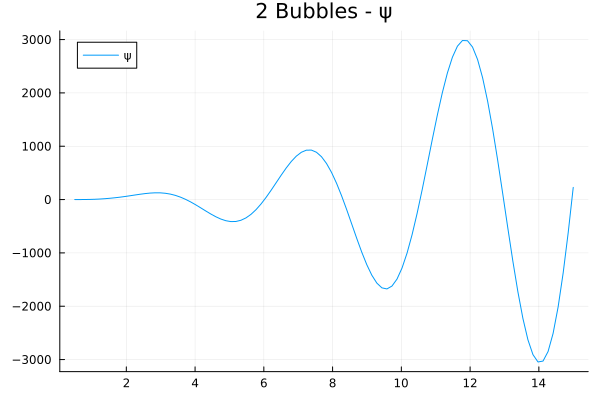

"/home/ben/.julia/dev/EnvelopeApproximation/scripts/gravitational_potentials/gravitational_potential.png"

In [7]:
p = plot(ηs, _ψ .|> real, label="ψ", title="2 Bubbles - ψ")
display(p)
savefig("gravitational_potential.png")

# Saving the data

In [16]:
using JLD2
data = Dict("ks" => k_vecs, "ηs" => ηs, "ψ" => _ψ)

jldsave("gravitational_potential_fixed_k_varying_eta.json"; ψ_data = data)